In [2]:
## import Modules
from sympy import *
from sympy.physics.mechanics import *
init_vprinting()

## Governing equation
m,k,g,t =symbols("m k g t")
x=dynamicsymbols("x")

vel=diff(x,t)
acc=diff(vel,t)

In [3]:
## Defining Lagrangian
KE= 0.5*m*(vel**2)
PE=0.5*k*(x**2) - m*g*x

lgr= KE - PE
eqn=diff(diff(lgr,vel),t) - diff(lgr,x)
sln=solve(eqn,acc)[0]
Eq(acc,sln)

In [4]:
## solve the GE
##import Modules
import numpy as np
from scipy.integrate import solve_ivp

# system constants & initial conditions
g=9.81
m=1
k=10
c=0.33
x0=0
vel0=0

def spring_mass_g(t,y):return (y[1],g - (y[0])*k/m - c*y[1]/m)

sol = solve_ivp(spring_mass_g,[0,10],[x0,vel0],t_eval=np.linspace(0,10,101))
x,vel=sol.y
t=sol.t

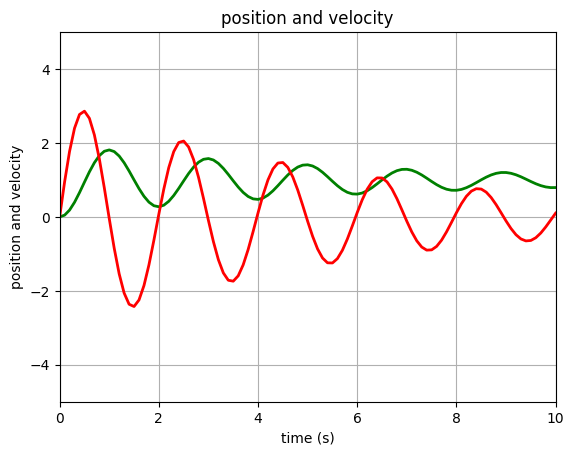

In [ ]:
## import modules
import matplotlib.pyplot as plt
import matplotlib.animation  as animation

# plot spring mass system
fig_curve,ax=plt.subplots()

ax.set_title("position and velocity")
ax.set_xlim(0,10)
ax.set_ylim(-5,5)
ax.set_xlabel("time (s)")
ax.set_ylabel("position and velocity")
ax.plot(t,x,"g",lw=2)
ax.plot(t,vel,"r",lw=2)
ax.grid()



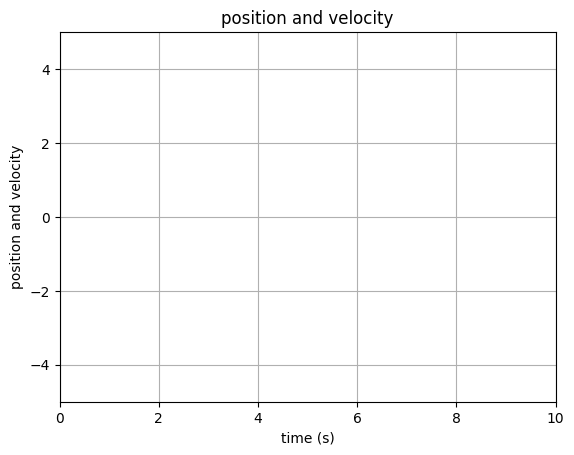

In [ ]:
## Animate curves 
import ffmpeg
curves,ax=plt.subplots()

position, =ax.plot(t[0],x[0],"g")
velocity, =ax.plot(t[0],vel[0],"r")
ax.set_title("position and velocity")
ax.set_xlim(0,10)
ax.set_ylim(-5,5)
ax.set_xlabel("time (s)")
ax.set_ylabel("position and velocity")
ax.grid()

def curve_animate(i):
    position.set_data([t[:i+1]],[x[:i+1]])
    velocity.set_data([t[:i+1]],[vel[:i+1]])

curve_anim=animation.FuncAnimation(curves,curve_animate,frames=len(t))
curve_anim.save("position_velocity_curves.mp4",writer=animation.FFMpegWriter(fps=30))


In [ ]:
## Phase Diagarm

